In [1]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Data Read
av=pd.read_csv('avocado.csv')

In [3]:
av.shape

(18249, 14)

In [4]:
av.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
av.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
av.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

# EDA

In [7]:
#Count of null values
av.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [8]:
#Drop insignificant variable - Unnamed 
av.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
#Convert date into datatime object
av['Date'] = pd.to_datetime(av['Date'])
print(av['Date'].dtype)

datetime64[ns]


In [10]:
#Create new variable month
av['Month'] = av['Date'].dt.month

In [11]:

av.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [12]:
av.head(3)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12


In [13]:
#Create new variable week
av['week'] = av['Date'].dt.week

In [14]:
av

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,week
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany,12,52
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany,12,51
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany,12,50
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany,12,49
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany,11,48
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,conventional,2015,Albany,11,47
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,conventional,2015,Albany,11,46
7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,conventional,2015,Albany,11,45
8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,conventional,2015,Albany,11,44
9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.00,conventional,2015,Albany,10,43


In [15]:
#Drop Date variable
hav=av.drop('Date',axis=1)

In [16]:
hav.head(5)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,week
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,52
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,51
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,50
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,49
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,48


In [17]:
hav['region'].value_counts().sort_values(ascending=False)

Pittsburgh             338
NorthernNewEngland     338
Columbus               338
Spokane                338
RichmondNorfolk        338
Syracuse               338
BuffaloRochester       338
HartfordSpringfield    338
SanDiego               338
RaleighGreensboro      338
Chicago                338
Plains                 338
Seattle                338
Houston                338
NewOrleansMobile       338
Jacksonville           338
Portland               338
Roanoke                338
California             338
PhoenixTucson          338
TotalUS                338
Sacramento             338
Denver                 338
SouthCarolina          338
BaltimoreWashington    338
DallasFtWorth          338
Midsouth               338
GreatLakes             338
CincinnatiDayton       338
Philadelphia           338
Nashville              338
MiamiFtLauderdale      338
Boston                 338
StLouis                338
SouthCentral           338
NewYork                338
Atlanta                338
L

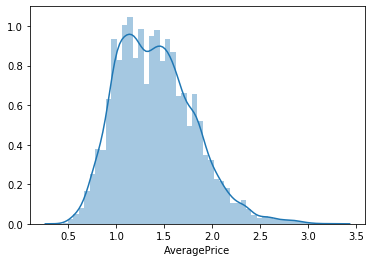

In [18]:
sns.distplot(hav['AveragePrice'])

In [19]:
min(hav['AveragePrice'])

0.44

In [20]:
max(hav['AveragePrice'])

3.25

In [21]:
hav['AveragePrice'].median()

1.37

In [22]:
hav['AveragePrice'].mean()

1.4059784097758825

In [23]:
hav['AveragePrice'].quantile([0.25,0.5,0.75,1])

0.25    1.10
0.50    1.37
0.75    1.66
1.00    3.25
Name: AveragePrice, dtype: float64

In [24]:
ak=hav.groupby('region')['AveragePrice'].mean()
ak=pd.DataFrame(ak)
ak.reset_index(inplace=True)
ak.rename(columns={'region':'region','AveragePrice':'Price'},inplace=True)
hav=pd.merge(hav,ak, on='region', how='left')

In [25]:
hav

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,week,Price
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany,12,52,1.561036
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany,12,51,1.561036
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany,12,50,1.561036
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany,12,49,1.561036
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany,11,48,1.561036
5,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,conventional,2015,Albany,11,47,1.561036
6,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,conventional,2015,Albany,11,46,1.561036
7,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,conventional,2015,Albany,11,45,1.561036
8,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,conventional,2015,Albany,11,44,1.561036
9,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.00,conventional,2015,Albany,10,43,1.561036


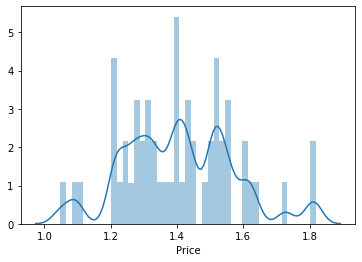

In [26]:
sns.distplot(hav['Price'])

In [27]:
hav['Price'].quantile([0.25,0.5,0.75,1])

0.25    1.286686
0.50    1.403284
0.75    1.516834
1.00    1.818639
Name: Price, dtype: float64

In [28]:
hav['Region Class']=pd.cut(hav['Price'],bins=[0,1.286686,1.403284,1.516834,1.9],labels=['Tier4','Tier3','Tier2','Tier1'])

In [29]:
hav['Total Revenue']=hav['AveragePrice']*hav['Total Volume']

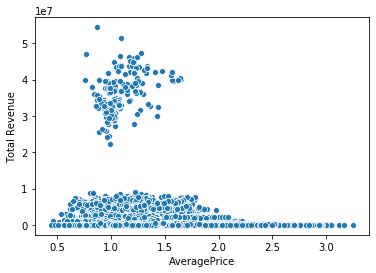

In [30]:
sns.scatterplot(hav['AveragePrice'],hav['Total Revenue'])

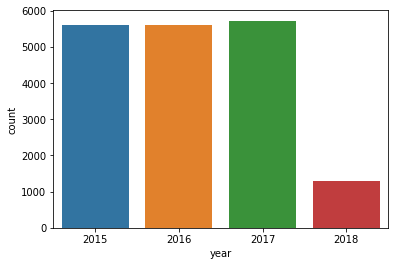

In [31]:
sns.countplot(hav['year'])

In [32]:
hav.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,week,Price,Total Revenue
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,1.824900e+04
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,25.235465,1.405978,9.279484e+05
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,15.483943,0.165111,3.686048e+06
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000,1.047929,1.344504e+02
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,11.000000,1.286686,1.716418e+04
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,25.000000,1.403284,1.395298e+05
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,39.000000,1.516834,5.141914e+05
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,53.000000,1.818639,5.437991e+07


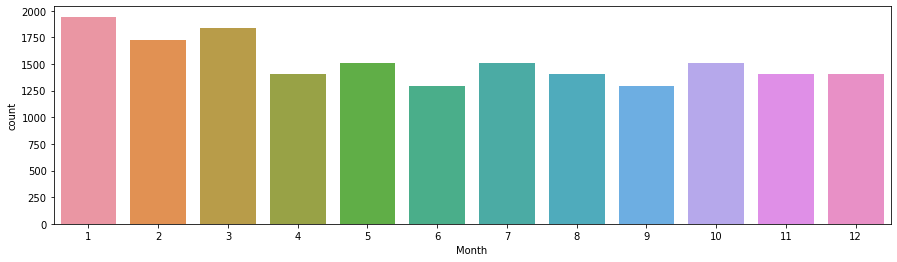

In [33]:
plt.subplots(figsize = (15,4))
sns.countplot(hav['Month'])

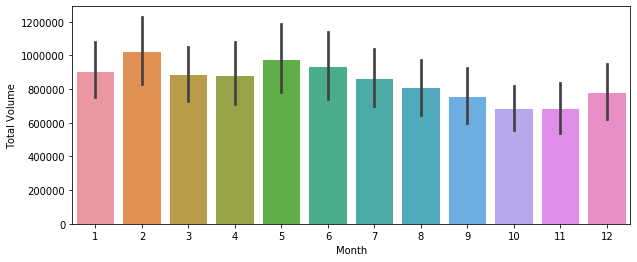

In [34]:
plt.subplots(figsize = (10,4))
sns.barplot(x = hav['Month'], y= hav['Total Volume'])

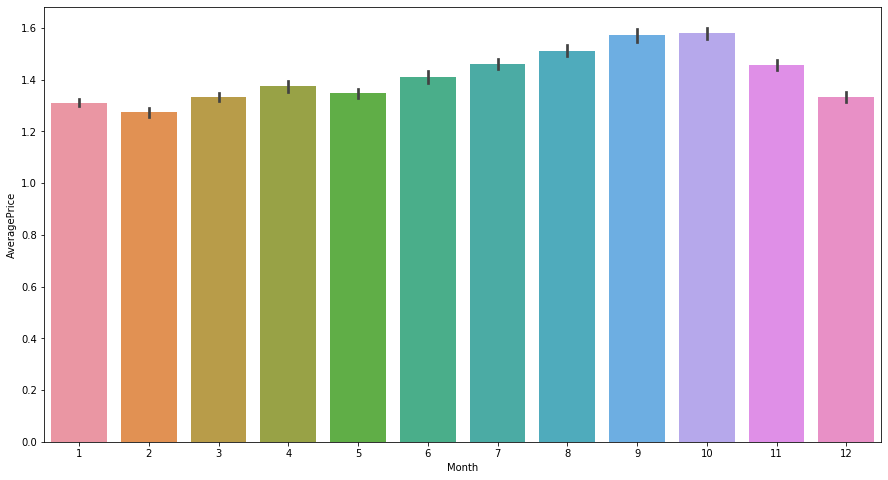

In [35]:
plt.subplots(figsize = (15,8))
sns.barplot(x = hav['Month'], y= hav['AveragePrice'])

#August, Sep and Oct having the highest average price

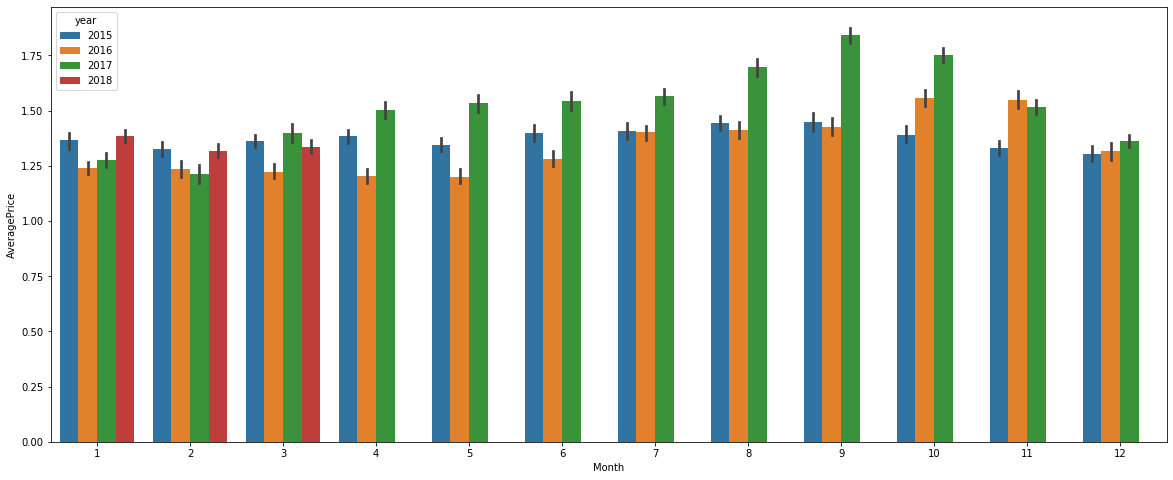

In [36]:
plt.subplots(figsize = (20,8))
sns.barplot(x = hav['Month'], y= hav['AveragePrice'],hue=hav['year'])

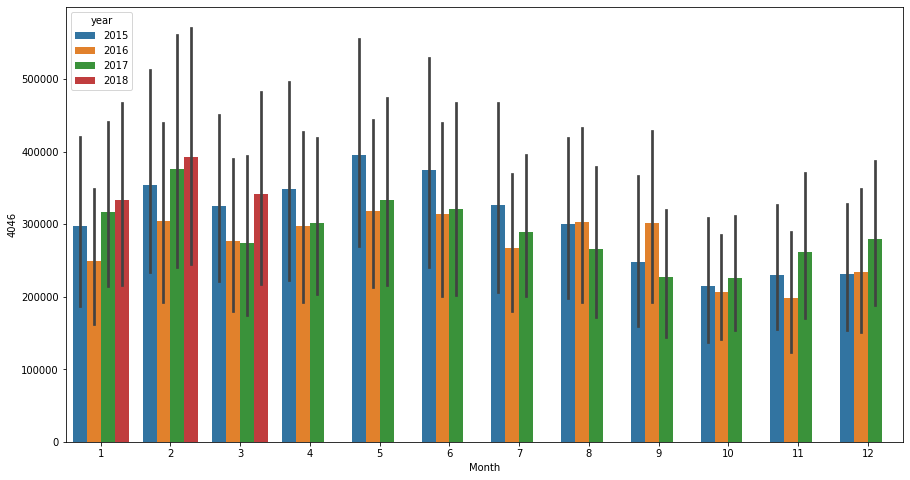

In [37]:
plt.subplots(figsize = (15,8))
sns.barplot(x = hav['Month'], y= hav['4046'],hue=hav['year'])

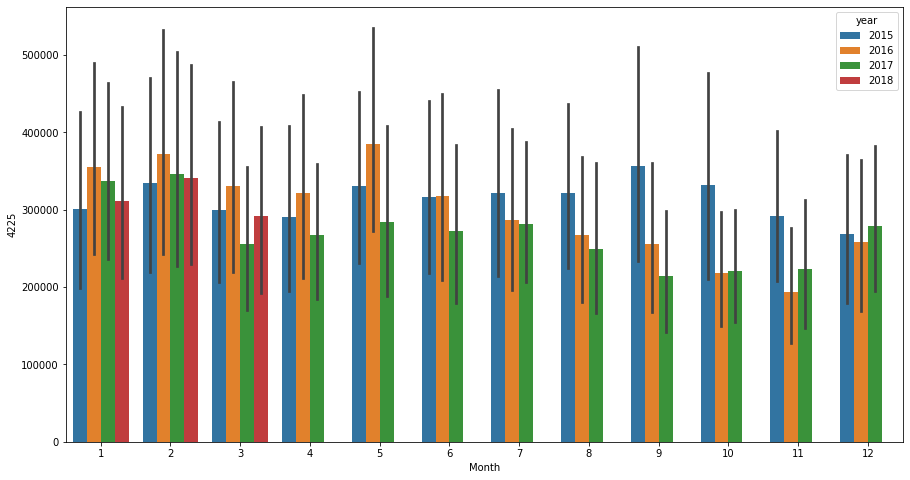

In [38]:
plt.subplots(figsize = (15,8))
sns.barplot(x = hav['Month'], y= hav['4225'],hue=hav['year'])

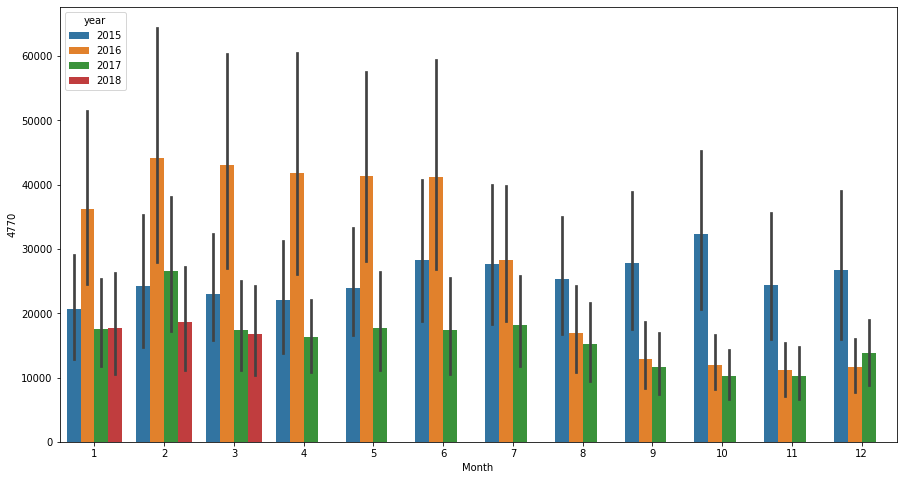

In [39]:
plt.subplots(figsize = (15,8))
sns.barplot(x = hav['Month'], y= hav['4770'],hue=hav['year'])

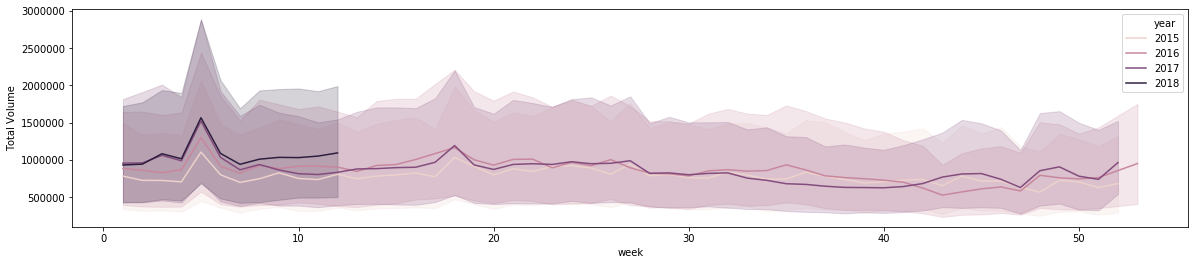

In [40]:
plt.subplots(figsize = (20,4))
sns.lineplot(x=hav['week'],y=hav['Total Volume'],hue=hav['year'])

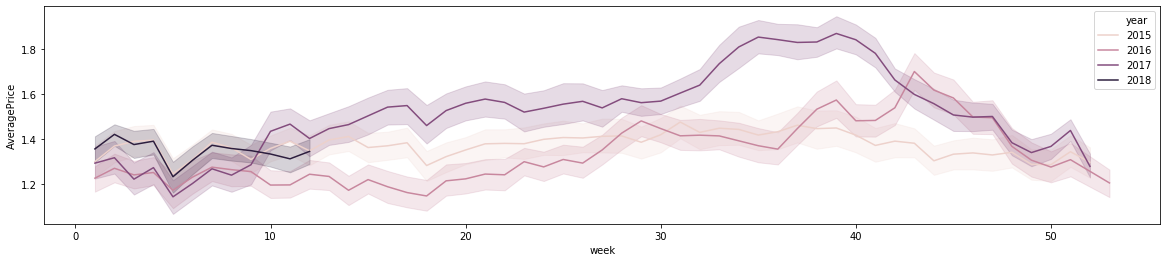

In [41]:
plt.subplots(figsize = (20,4))
sns.lineplot(x=hav['week'],y=hav['AveragePrice'],hue=hav['year'])

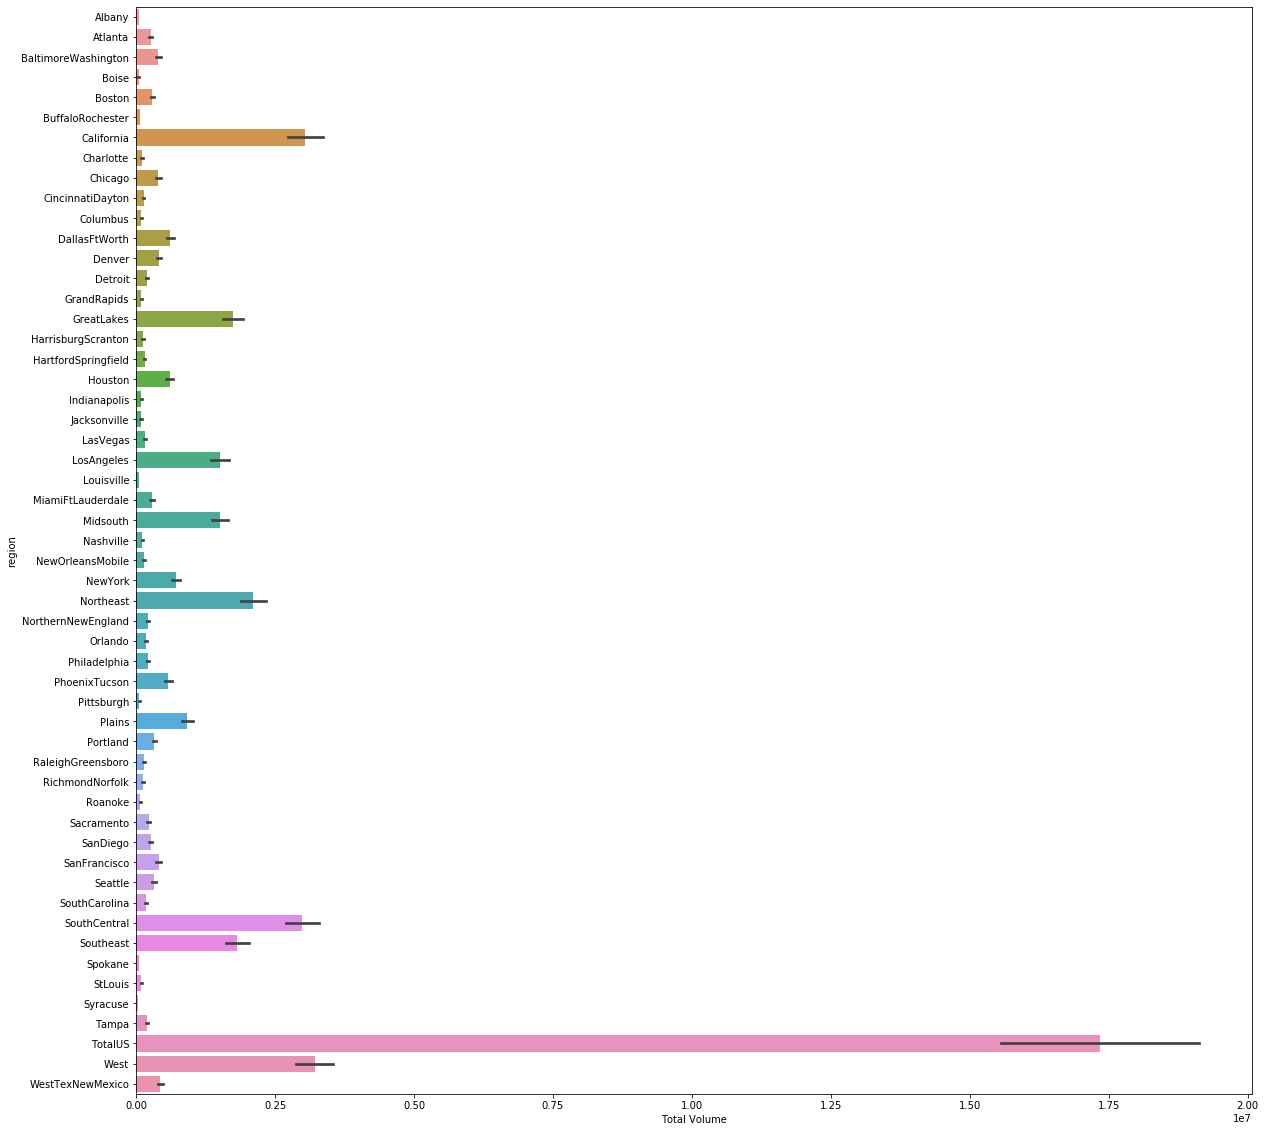

In [42]:
plt.subplots(figsize = (20,20))
sns.barplot(y = hav['region'], x= hav['Total Volume'])

Large number of avocados are sold in TotalUS and California across years 


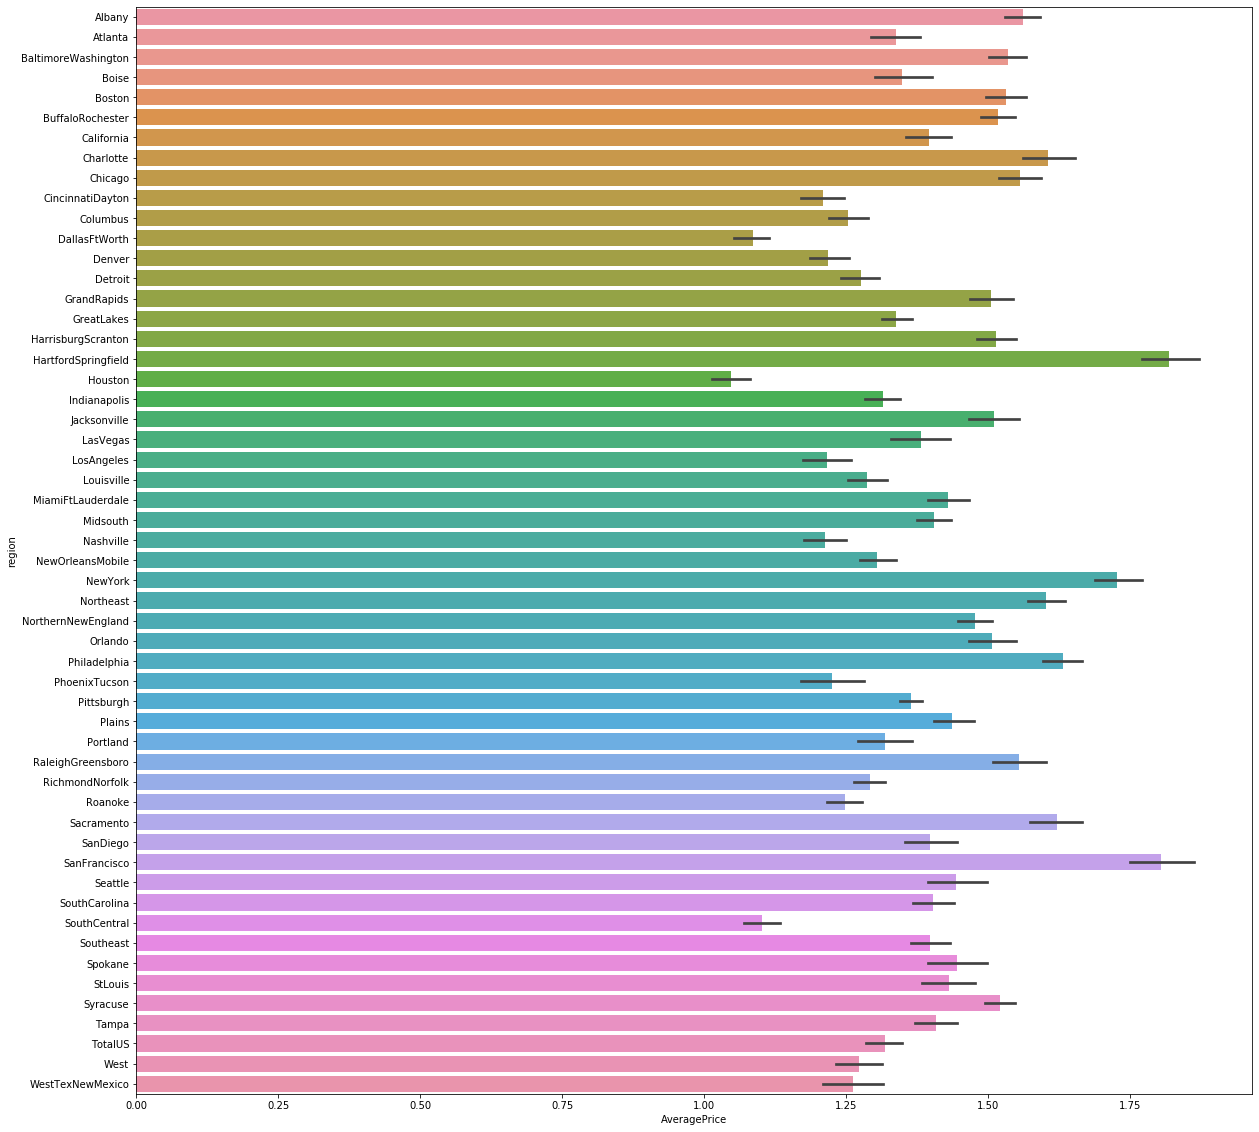

In [43]:
plt.subplots(figsize = (20,20))
sns.barplot(y = hav['region'], x= hav['AveragePrice'])

SanFrancisco , HartfordSpringfield and Newyork having highest Averageprice across years

In [44]:
min(hav['Total Volume'])

84.56

In [45]:
max(hav['Total Volume'])

62505646.52

In [46]:
hav['Total Volume'].median()

107376.76

In [47]:
hav['Total Volume'].mean()

850644.0130089332

In [48]:
hav.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,week,Price,Region Class,Total Revenue
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,52,1.561036,Tier1,85434.7046
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,51,1.561036,Tier1,74083.9230
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,50,1.561036,Tier1,109944.8046
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,49,1.561036,Tier1,85311.5220
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,48,1.561036,Tier1,65330.6880


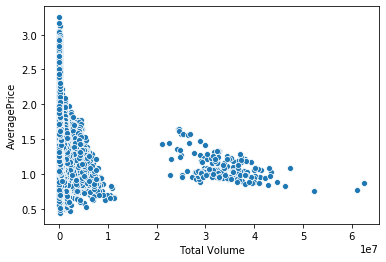

In [49]:
sns.scatterplot(hav['Total Volume'],hav['AveragePrice'])

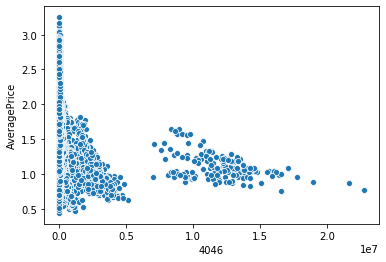

In [50]:
sns.scatterplot(hav['4046'],hav['AveragePrice'])

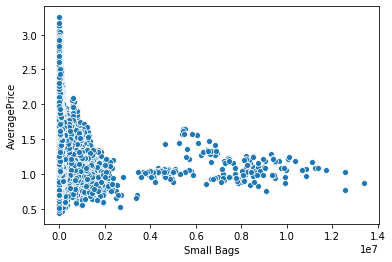

In [51]:
sns.scatterplot(hav['Small Bags'],hav['AveragePrice'])

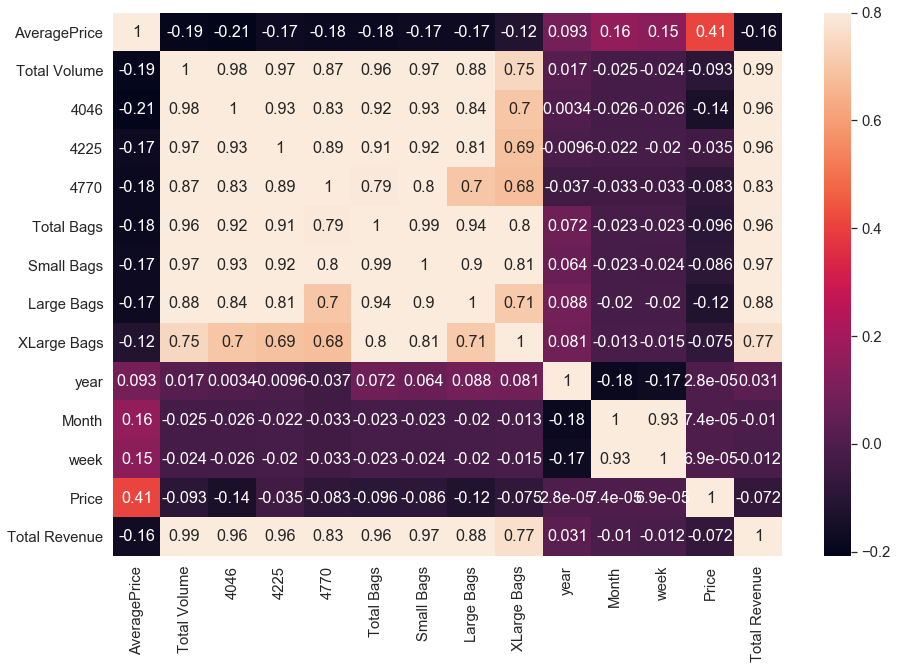

In [52]:
sns.set(font_scale=1.35)
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(hav.corr(), annot = True, vmax =.8)

Total Bags is the sum of SmallBags,LargeBags and XLargeBags. Hence eliminating these columns having multicollinearity property

In [53]:
hav.drop(columns=['Small Bags','Large Bags','XLarge Bags','Total Bags','4046','4225','4770','region','Price'],axis=1,inplace=True)


In [54]:
hav.head(3)

,AveragePrice,Total Volume,type,year,Month,week,Region Class,Total Revenue
0,1.33,64236.62,conventional,2015,12,52,Tier1,85434.7046
1,1.35,54876.98,conventional,2015,12,51,Tier1,74083.9230
2,0.93,118220.22,conventional,2015,12,50,Tier1,109944.8046


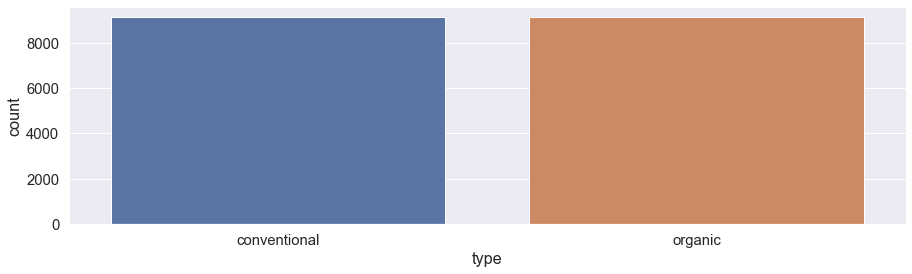

In [55]:
plt.subplots(figsize = (15,4))
sns.countplot(hav['type'])

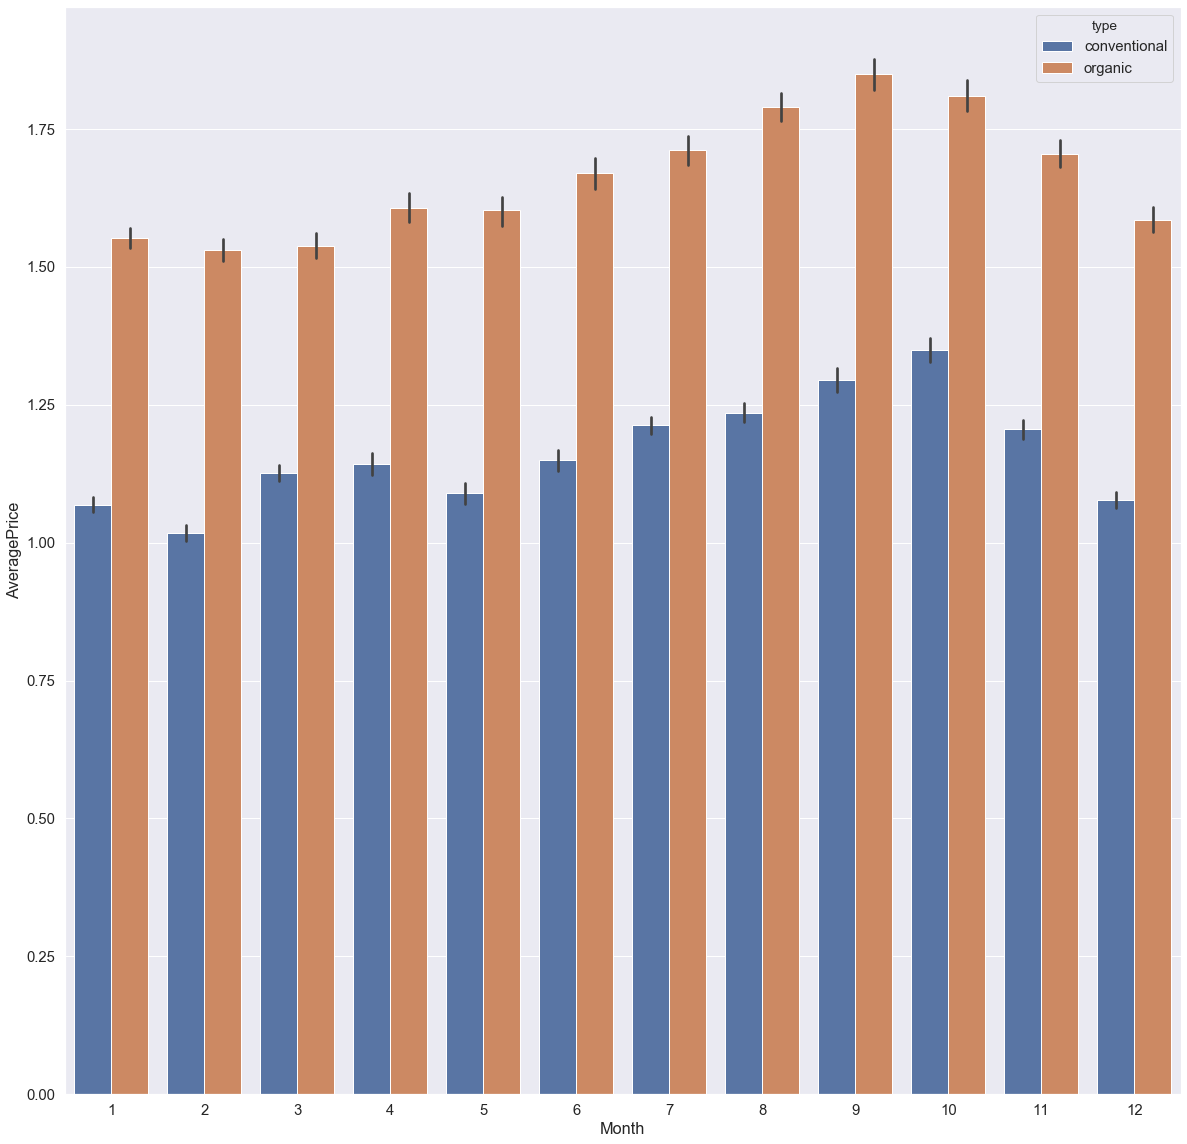

In [56]:
plt.subplots(figsize = (20,20))
sns.barplot(x = hav['Month'], y= hav['AveragePrice'],hue=hav['type'])

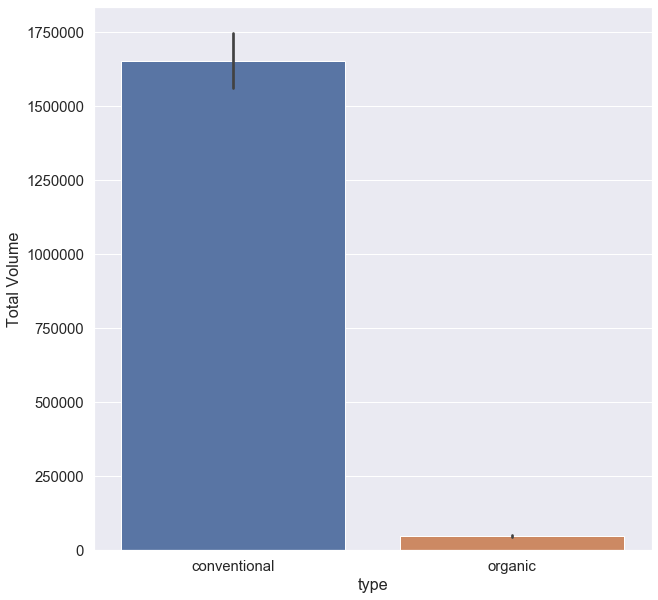

In [57]:
plt.subplots(figsize = (10,10))
sns.barplot(x = hav['type'], y= hav['Total Volume'])

In [58]:
hav=pd.get_dummies(hav,drop_first=True)
hav.head()

,AveragePrice,Total Volume,year,Month,week,Total Revenue,type_organic,Region Class_Tier3,Region Class_Tier2,Region Class_Tier1
0,1.33,64236.62,2015,12,52,85434.7046,0,0,0,1
1,1.35,54876.98,2015,12,51,74083.9230,0,0,0,1
2,0.93,118220.22,2015,12,50,109944.8046,0,0,0,1
3,1.08,78992.15,2015,12,49,85311.5220,0,0,0,1
4,1.28,51039.60,2015,11,48,65330.6880,0,0,0,1


In [59]:
hav.columns

Index(['AveragePrice', 'Total Volume', 'year', 'Month', 'week',
       'Total Revenue', 'type_organic', 'Region Class_Tier3',
       'Region Class_Tier2', 'Region Class_Tier1'],
      dtype='object')

In [60]:
X = hav.drop('AveragePrice',axis=1)
y = hav['AveragePrice']

In [61]:
X.shape

(18249, 9)

In [62]:
y.shape

(18249,)

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 8)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(12774, 9) (5475, 9) (12774,) (5475,)


In [64]:
X_train.head()

,Total Volume,year,Month,week,Total Revenue,type_organic,Region Class_Tier3,Region Class_Tier2,Region Class_Tier1
4039,92553.22,2016,4,16,8.607449e+04,0,1,0,0
16652,35195.10,2017,12,49,4.997704e+04,1,1,0,0
4991,719749.77,2016,1,53,4.678374e+05,0,1,0,0
16799,13878.02,2017,2,8,1.401680e+04,1,1,0,0
8367,39373579.25,2017,1,4,3.779864e+07,0,1,0,0


In [65]:
X_test.head()

,Total Volume,year,Month,week,Total Revenue,type_organic,Region Class_Tier3,Region Class_Tier2,Region Class_Tier1
5758,749186.76,2017,4,16,1.251142e+06,0,0,0,1
11927,9271.68,2015,2,6,1.539099e+04,1,0,0,0
16428,4818.73,2017,2,8,1.002296e+04,1,0,1,0
5012,753570.45,2016,8,31,1.122820e+06,0,0,0,1
18007,13514.36,2018,1,2,2.392042e+04,1,0,0,0


In [66]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [67]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
y_pred = model.predict(X_test)
y_pred

array([1.38943358, 1.32137288, 1.65925163, ..., 1.52214677, 1.04077587,
       1.97163902])

In [69]:
model.score(X_train,y_train)

0.5700017062786806

In [70]:
model.score(X_test,y_test)

0.5771995307864584

In [71]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_squared_error(y_test, y_pred)

0.0655472359706966

In [72]:
mean_absolute_error(y_test, y_pred)

0.19401910531385186

In [73]:
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)


In [74]:
clf = LinearRegression().fit(X_train_transformed, y_train)
X_test_transformed = scaler.transform(X_test)
clf.score(X_test_transformed, y_test)

0.5702718634928071

In [75]:
clf.score(X_train_transformed, y_train)

0.5725725568738262

# Classification

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score, classification_report, confusion_matrix, roc_auc_score  

In [77]:
Xt = hav.drop('type_organic',axis=1)
yt = hav['type_organic']

In [78]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(Xt,yt,test_size=0.3,random_state = 8)
print(X_train1.shape,X_test1.shape,y_train1.shape,y_test1.shape)

(12774, 9) (5475, 9) (12774,) (5475,)


In [79]:
X_train1.head()

,AveragePrice,Total Volume,year,Month,week,Total Revenue,Region Class_Tier3,Region Class_Tier2,Region Class_Tier1
4039,0.93,92553.22,2016,4,16,8.607449e+04,1,0,0
16652,1.42,35195.10,2017,12,49,4.997704e+04,1,0,0
4991,0.65,719749.77,2016,1,53,4.678374e+05,1,0,0
16799,1.01,13878.02,2017,2,8,1.401680e+04,1,0,0
8367,0.96,39373579.25,2017,1,4,3.779864e+07,1,0,0


In [80]:
log = LogisticRegression(random_state=42)
logmodel = log.fit(X_train1, y_train1)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [81]:
print("Trainig accuracy",log.score(X_train1,y_train1))  
print("Testing accuracy",log.score(X_test1, y_test1))

Trainig accuracy 0.9043369343979959
Testing accuracy 0.9052054794520548


In [82]:
y_pred1 = logmodel.predict(X_test1)
y_pred1

array([0, 1, 1, ..., 1, 0, 1], dtype=uint8)

In [83]:
print("F1 Score: ",f1_score(y_test1, y_pred1, average='binary'), "\n====================")
print("Classification Report\n ", classification_report(y_test1,y_pred1), "\n====================")
print("Confusion Matrix\n ", confusion_matrix(y_test1, y_pred1), "\n====================")
print("ROC AUC Score: ",roc_auc_score(y_test1,y_pred1))

F1 Score:  0.909249868858192 
Classification Report
                precision    recall  f1-score   support

           0       0.94      0.86      0.90      2725
           1       0.88      0.95      0.91      2750

    accuracy                           0.91      5475
   macro avg       0.91      0.91      0.91      5475
weighted avg       0.91      0.91      0.91      5475
 
Confusion Matrix
  [[2356  369]
 [ 150 2600]] 
ROC AUC Score:  0.905020850708924
